# K-means clustring

- It is the type of unsupervised machine learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# importig thee data in features
X = df[['age', 'fare']]
X['age']=df.age.fillna(X['age'].mean())

#scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform the clustring
model= KMeans(n_clusters=5)
model.fit(X_scaled)

# assign cluster lables to the data
df['cluster'] = model.labels_

C:\Users\HP\AppData\Local\Temp\ipykernel_10164\2587127244.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age']=df.age.fillna(X['age'].mean())
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3


In [4]:
df['cluster'].unique()

array([1, 4, 3, 0, 2])

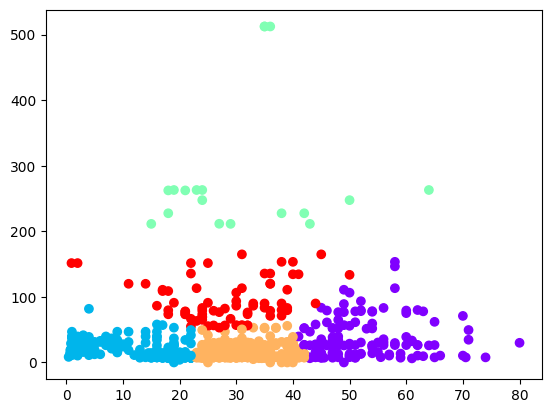

In [5]:
# ploting (scatter plot)
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')
plt.show()

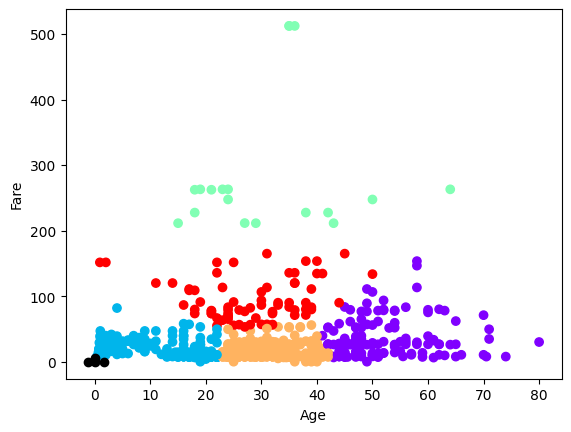

In [6]:
# with centroids
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [7]:
# plotly
import plotly.express as px
fig = px.scatter(df, x='age', y='fare', color='cluster')
fig.show()

In [8]:
# 3D plotting by plotly
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='fare',z='pclass', color='cluster')
fig.show()

In [9]:
fig= px.parallel_coordinates(df, color='cluster')
fig.show()

In [10]:
# install the library
#pip install joblib

In [11]:
# saving the model
import joblib
joblib.dump(model, 'KMeansClustring.joblib')

['KMeansClustring.joblib']

In [12]:
# load the saved model
model_saved = joblib.load('KMeansClustring.joblib')

## DiscisionTreeClassifier saving model(joblib)

In [13]:
import seaborn as sns

df_1 = sns.load_dataset('tips')
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [14]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [16]:
# label encoding (convert categorical value to numeric numbers)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['smoker'])

# transforming the model
df_1['smoker'] = le.transform(df_1['smoker'])

In [17]:
# label encoding (convert categorical value to numeric numbers)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['day'])

# transforming the model
df_1['day'] = le.transform(df_1['day'])

In [18]:
# label encoding (convert categorical value to numeric numbers)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['time'])

# transforming the model
df_1['time'] = le.transform(df_1['time'])

In [19]:
X= df_1.drop(columns=['sex'])
y=df_1['sex']

In [20]:
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [21]:
# model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X,y)

# now model trained

In [22]:
# now we will save the ML model 
import joblib
joblib.dump(model, 'tipsModel.joblib')

['tipsModel.joblib']

In [23]:
# loading the model
model_1 = joblib.load('tipsModel.joblib')

In [24]:
model_1

DecisionTreeClassifier()

In [25]:
'''

# saving model with pickle library
import pickle  #built in library

# save the model
with open('model.pkl', 'wb') as f:     # wb is write binaries
    pickle.dump(model.f)

# load the model
with open('model.pkl', 'rb') as f:     # rb is read binaries
    loaded_model = pickle.load(f)    

'''

"\n\n# saving model with pickle library\nimport pickle  #built in library\n\n# save the model\nwith open('model.pkl', 'wb') as f:     # wb is write binaries\n    pickle.dump(model.f)\n\n# load the model\nwith open('model.pkl', 'rb') as f:     # rb is read binaries\n    loaded_model = pickle.load(f)    \n\n"

---
## July 22, 2023